In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Data = pd.read_csv("/content/water_potability.csv")
Data.shape

(3276, 10)

In [ ]:
Data.describe()
#Description of the initial data

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
Data.info()
#some information about the initial data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
sum(Data.duplicated()) == 0
#there is no duplicated data

True

In [ ]:
print (Data.isnull().sum())
print (Data.isnull().values.any())
print (Data.isnull().values.sum())
# checking if tyhere is any null values in the dataset then print the sum of the null values in each column then the sum of the null values in the whole dataset
# there is 491 null values in col. ph , 781 null values in col. sulfate , 162 null values in col. trihalomethanes

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
True
1434


In [ ]:
Data.isnull().sum()*100/Data.shape[0]
#calculating the percentage of null values in each column of the dataset to know what to do with the nulls
# there is 14.98% null values from the total values of column ph , 23.8% of the column sulfate and 4.94% of the column trihalomethanes are null values

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
Data['Sulfate'].fillna(value=Data['Sulfate'].median(),inplace=True)
Data.info()
# fiiling nulls of the column sulfate by the median as the difference between the max and min is large so will be the mean wich will result in a skewed graph if we used it to fill the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
Data['ph'].fillna(value=Data['ph'].mean(),inplace=True)
Data.info()
# filling the null,s in the column 'ph' by the mean as the difference between the max and min isn't big so their mean wont result in a problems to the graph

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
Data['Trihalomethanes'].fillna(value=Data['Trihalomethanes'].mean(),inplace=True)
Data.info()
# filling the null,s in the column 'ph' by the mean as the difference between the max and min isn't big so their mean wont result in a problems to the graph

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
Data.head(10)
#Nulls are removed

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246  333.073546    592.885359   
2   8.099124  224.236259  19909.541732     9.275884  333.073546    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8   7.080795  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [ ]:
Data.describe()
#Details of the new data after filling nulls with the most suitable values

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.608364   
std       1.469956    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.396293     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
Data.info()
#All tha data has been cleaned and preprocessed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
print((Data['Potability']==1).sum())
print((Data['Potability']==0).sum())
# viewing the number of the drinkable water samples and the undrinkable water samples from the data we have

1278
1998


In [ ]:
print((((Data['Potability']==1).sum())/3276)*100)
#calculating the percent of the drinkable water
print((((Data['Potability']==0).sum())/3276)*100)
# calculating the percent of undrinkable water
# percent of undrinkable water is more than the percent of the drinkable water

39.010989010989015
60.98901098901099


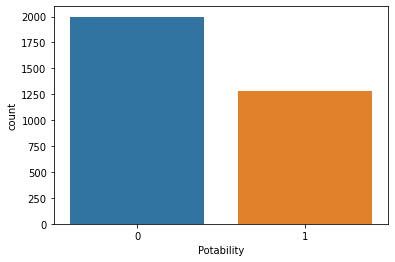

In [ ]:
sns.countplot(x="Potability",data=Data)
# its obvious that the drinkable water is less than the undrinkable water

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


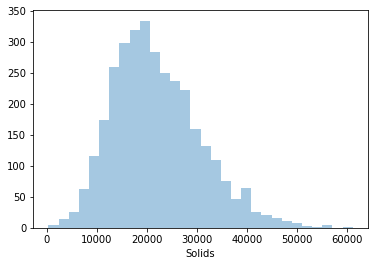

In [ ]:
sns.distplot(Data['Solids'],kde=False,bins=30)
# visualization of the data in the 'solids' columnm after the modifications we performed
# it seems that 2000 is the mode and the graph is right skewed alittle bit

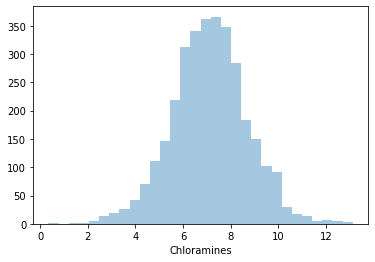

In [ ]:
sns.distplot(Data['Chloramines'],kde=False,bins=30)
# visualization of the data in the 'chloramines' columnm after the modifications we performed
# it seems that 7 is the mode

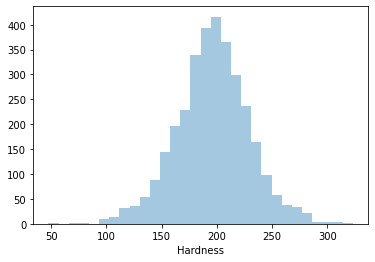

In [ ]:
sns.distplot(Data['Hardness'],kde=False,bins=30)
# visualization of the data in the 'hardness' columnm after the modifications we performed
# it seems that 200 is the mode

In [ ]:
sns.distplot(Data['Sulfate'],kde=False,bins=30)
# visualization of the data in the 'sulfate' columnm after the modifications we performed
# it seems that 325 is the mode and the graph is left skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


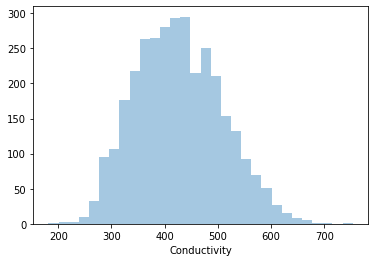

In [ ]:
sns.distplot(Data['Conductivity'],kde=False,bins=30)
# visualization of the data in the 'conductivity' columnm after the modifications we performed

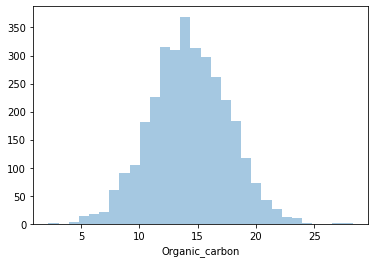

In [ ]:
sns.distplot(Data['Organic_carbon'],kde=False,bins=30)
# visualization of the data in the 'organic carbon' columnm after the modifications we performed
#it seems that 13 is the mode

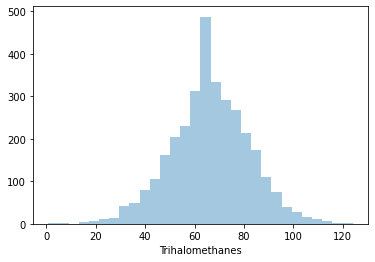

In [ ]:
sns.distplot(Data['Trihalomethanes'],kde=False,bins=30)
# visualization of the data in the 'trihalomethanes' columnm after the modifications we performed
# it seems that 70 is the mode and the graph is left skewed

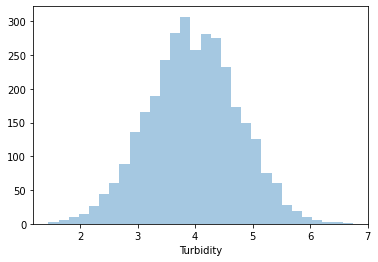

In [ ]:
sns.distplot(Data['Turbidity'],kde=False,bins=30)
# visualization of the data in the 'turbidity' columnm after the modifications we performed

In [ ]:
Data['Sulfate'].corr(Data['Conductivity'])
# weak correlation

-0.014182378719379907

In [ ]:
Data['Organic_carbon'].corr(Data['Conductivity'])
# weak correlation

0.020966360660054667

In [ ]:
Data['Trihalomethanes'].corr(Data['Conductivity'])
# weak correlation

0.0012550882747684418

In [ ]:
Data['Chloramines'].corr(Data['Conductivity'])
# weak correlation

-0.020486409208364368

In [ ]:
Data['Organic_carbon'].corr(Data['Turbidity'])
# weak correlation

-0.02730811302447364

In [ ]:
Data['Sulfate'].corr(Data['Turbidity'])
# weak correlation

-0.009767387447052708

In [ ]:
Data['Trihalomethanes'].corr(Data['Turbidity'])
# weak correlation

-0.021501539133605127

In [ ]:
Data['Chloramines'].corr(Data['Turbidity'])
# weak correlation

0.002363321068449002

In [ ]:
Data['Sulfate'].corr(Data['Hardness'])
# weak correlation

-0.09283319849584025

In [ ]:
Data['Organic_carbon'].corr(Data['Hardness'])
# weak correlation

0.0036100403237357996

In [ ]:
Data['Trihalomethanes'].corr(Data['Hardness'])
# weak correlation

-0.012689828644591925

In [ ]:
Data['Chloramines'].corr(Data['Hardness'])
# weak correlation

-0.030054238563768716

In [ ]:
# Matrix form for correlation data
Data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014428   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092833   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149747   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023762   
Sulfate          0.014428 -0.092833 -0.149747     0.023762  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014182   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.027102   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025696   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009767   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020476   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014182        0.027102        -0.025696  -0.009767   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020476  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

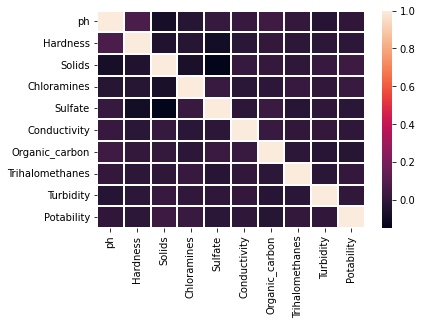

In [ ]:
sns.heatmap(Data.corr(),linecolor='white',linewidths=1)

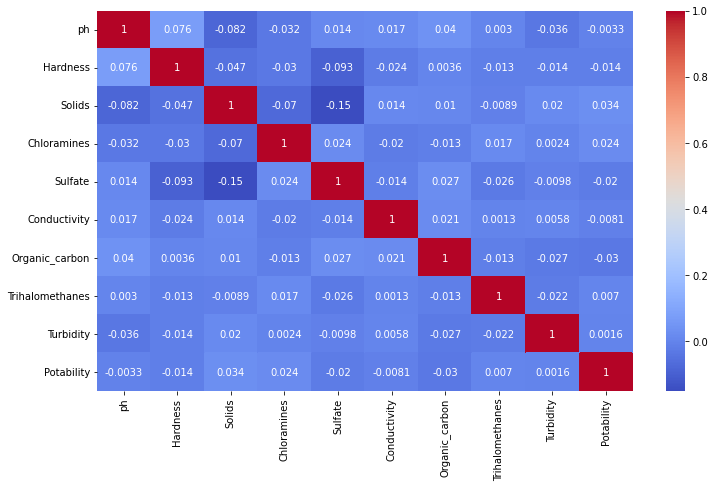

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(Data.corr(),cmap='coolwarm',annot=True)
# measuring the correletaions betwwen each column and the the other columns (the whole data) and its obvious that the correletaion all over the dataset is weak

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(Data, title='Water Potability', html= {'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# making a box plot to all the columns so we can determine the outliers and thier range wich are the reason of the skewed graphs

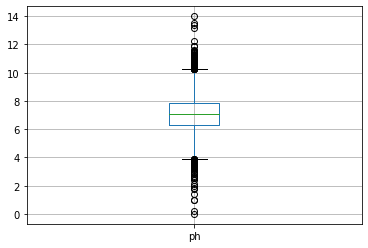

In [ ]:
Data.boxplot(column=['ph'])

In [ ]:
for x in ['ph']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan
    #change the value of outliers to nulls

In [ ]:
Data.isnull().sum()

ph                 142
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]
#checking the percentage of the null values(outliers) in the ph column

ph                 4.334554
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)
#Dropping the null values

In [ ]:
Data.isnull().sum()
#outliers are removed

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

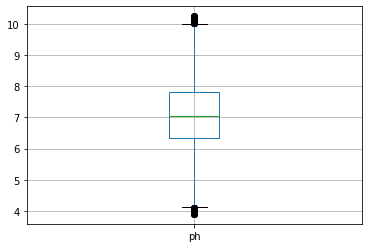

In [ ]:
Data.boxplot(column=['ph'])


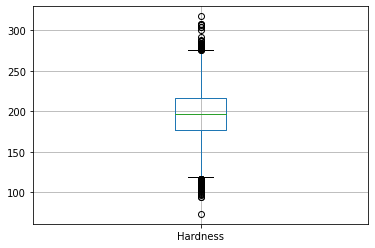

In [ ]:
Data.boxplot(column=['Hardness'])

In [ ]:
for x in ['Hardness']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                  0
Hardness           74
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Turbidity           0
Potability          0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]


ph                 0.0000
Hardness           2.3612
Solids             0.0000
Chloramines        0.0000
Sulfate            0.0000
Conductivity       0.0000
Organic_carbon     0.0000
Trihalomethanes    0.0000
Turbidity          0.0000
Potability         0.0000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)

In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

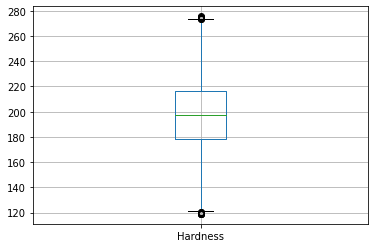

In [ ]:
Data.boxplot(column=['Hardness'])


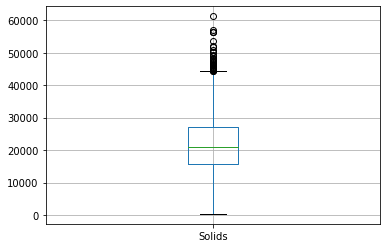

In [ ]:
Data.boxplot(column=['Solids'])

In [ ]:
for x in ['Solids']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                  0
Hardness            0
Solids             41
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Turbidity           0
Potability          0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]


ph                 0.000000
Hardness           0.000000
Solids             1.339869
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

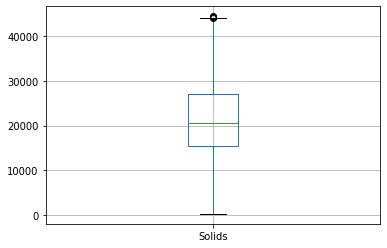

In [ ]:
Data.boxplot(column=['Solids'])


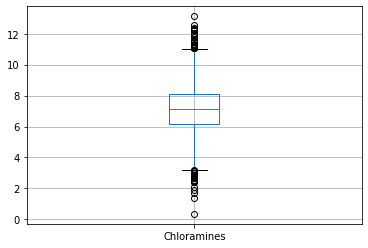

In [ ]:
Data.boxplot(column=['Chloramines'])

In [ ]:
for x in ['Chloramines']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                  0
Hardness            0
Solids              0
Chloramines        52
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Turbidity           0
Potability          0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]

ph                 0.000000
Hardness           0.000000
Solids             0.000000
Chloramines        1.722425
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

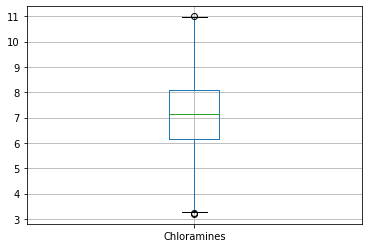

In [ ]:
Data.boxplot(column=['Chloramines'])


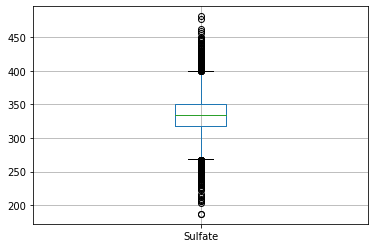

In [ ]:
Data.boxplot(column=['Sulfate'])


In [ ]:
for x in ['Sulfate']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            229
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]

ph                 0.000000
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            7.718234
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

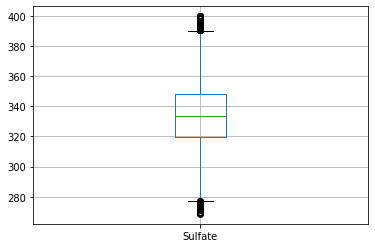

In [ ]:
Data.boxplot(column=['Sulfate'])

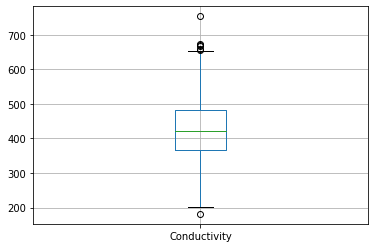

In [ ]:
Data.boxplot(column=['Conductivity'])

In [ ]:
for x in ['Conductivity']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       7
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]


ph                 0.000000
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.255661
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

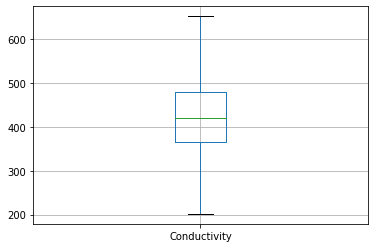

In [ ]:
Data.boxplot(column=['Conductivity'])


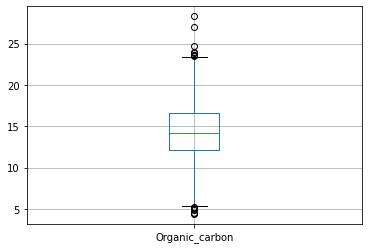

In [ ]:
Data.boxplot(column=['Organic_carbon'])

In [ ]:
for x in ['Organic_carbon']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon     15
Trihalomethanes     0
Turbidity           0
Potability          0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]


ph                 0.000000
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.549249
Trihalomethanes    0.000000
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

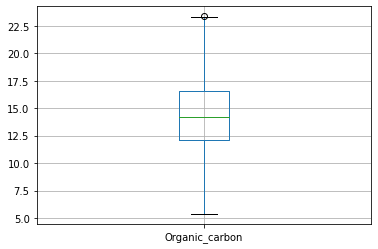

In [ ]:
Data.boxplot(column=['Organic_carbon'])


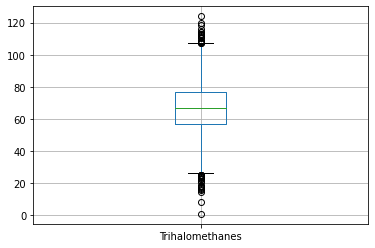

In [ ]:
Data.boxplot(column=['Trihalomethanes'])


In [ ]:
for x in ['Trihalomethanes']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes    41
Turbidity           0
Potability          0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]


ph                 0.000000
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    1.509573
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

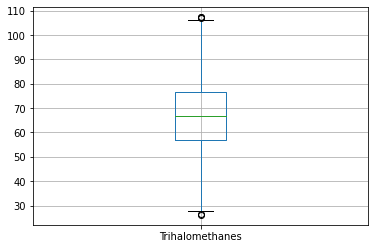

In [ ]:
Data.boxplot(column=['Trihalomethanes'])


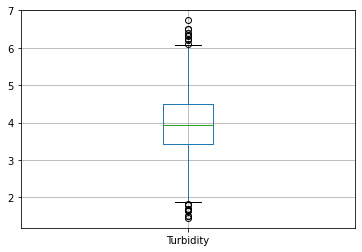

In [ ]:
Data.boxplot(column=['Turbidity'])


In [ ]:
for x in ['Turbidity']:
    q75,q25 = np.percentile(Data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    Data.loc[Data[x] < min,x] = np.nan
    Data.loc[Data[x] > max,x] = np.nan


In [ ]:
Data.isnull().sum()

ph                  0
Hardness            0
Solids              0
Chloramines         0
Sulfate             0
Conductivity        0
Organic_carbon      0
Trihalomethanes     0
Turbidity          18
Potability          0
dtype: int64

In [ ]:
Data.isnull().sum()*100/Data.shape[0]


ph                 0.000000
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.000000
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.000000
Turbidity          0.672897
Potability         0.000000
dtype: float64

In [ ]:
Data = Data.dropna(axis = 0)


In [ ]:
Data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

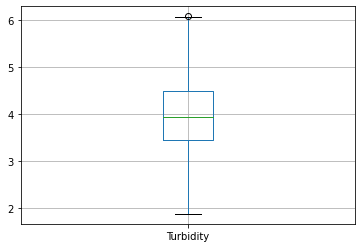

In [ ]:
Data.boxplot(column=['Turbidity'])


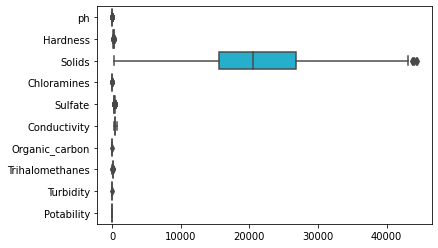

In [ ]:
# drawing a box plot for the whole data (all the columns)
sns.boxplot(data=Data,palette='rainbow',orient='h')
# orient h to male the box plot horizontal (we make it by replacing the x and y at passing them to the boxplot() method)

In [ ]:

data_of_model = Data
X = data_of_model.drop('Potability',axis=1)
y = data_of_model['Potability']

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split
# assign 33% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# create the model
DTree = DecisionTreeClassifier(max_depth = 4, random_state = 42, min_samples_leaf = 1, criterion ='entropy')
# model training
DTree.fit(X_train,y_train)
# prediction
DTree_prediction = DTree.predict(X_test)
# accuracy
DTree_acc = accuracy_score(y_test, DTree_prediction)

In [ ]:
print("The accuracy for Decision Tree is", DTree_acc*100)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DTree_prediction))

The accuracy for Decision Tree is 63.397947548460664
The classification report using Decision Tree is:
              precision    recall  f1-score   support

         0.0       0.65      0.90      0.76       554
         1.0       0.51      0.18      0.27       323

    accuracy                           0.63       877
   macro avg       0.58      0.54      0.51       877
weighted avg       0.60      0.63      0.58       877



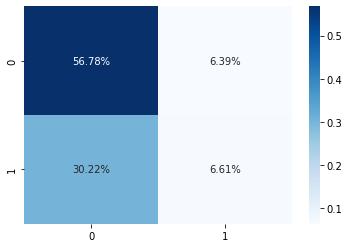

In [ ]:
# let's plot confusion matrix
DeTree_cm = confusion_matrix(y_test, DTree_prediction)
sns.heatmap(DeTree_cm/np.sum(DeTree_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# create the model
LogReg = LogisticRegression(random_state = 42)
# model training
LogReg.fit(X_train, y_train)
# prediction
LogReg_pred = LogReg.predict(X_test)
# accuracy
LogReg_acc = accuracy_score(y_test, LogReg_pred)

In [ ]:
print("The accuracy for Logistic Regression is", LogReg_acc*100)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 63.169897377423034
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       554
         1.0       0.00      0.00      0.00       323

    accuracy                           0.63       877
   macro avg       0.32      0.50      0.39       877
weighted avg       0.40      0.63      0.49       877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


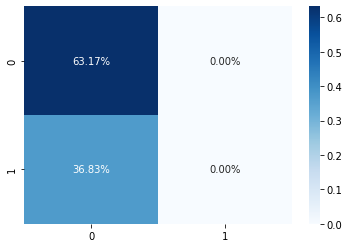

In [ ]:
# let's plot confusion matrix
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# create the model
KNN = KNeighborsClassifier(n_neighbors = 8, leaf_size =20)
# model training
KNN.fit(X_train, y_train)
# prediction
KNN_pred = KNN.predict(X_test)
# accuracy
KNN_acc = accuracy_score(y_test, KNN_pred)

In [ ]:
print("The accuracy for KNeighbors is", KNN_acc*100)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 59.97719498289624
The classification report using KNeighbors is: 0.5997719498289624
              precision    recall  f1-score   support

         0.0       0.64      0.85      0.73       554
         1.0       0.40      0.18      0.25       323

    accuracy                           0.60       877
   macro avg       0.52      0.51      0.49       877
weighted avg       0.55      0.60      0.55       877



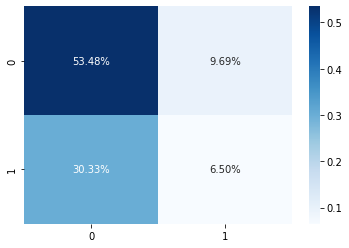

In [ ]:
# let's plot confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test) * 100)

53.36374002280502


In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
# create the model
SVM = SVC(kernel ='rbf', random_state = 42)
# model training
SVM.fit(X_train, y_train)
# prediction
SVM_pred = SVM.predict(X_test)
# accuracy
SVM_acc = accuracy_score(y_test, SVM_pred)

In [ ]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.6316989737742303
The classification report using SVM is: 0.6316989737742303
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       554
         1.0       0.00      0.00      0.00       323

    accuracy                           0.63       877
   macro avg       0.32      0.50      0.39       877
weighted avg       0.40      0.63      0.49       877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


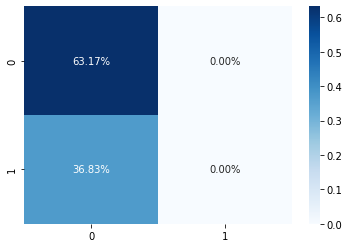

In [ ]:
# let's plot confusion matrix
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Blues')